In [7]:
import glob
from os.path import join as oj

import numpy as np
import os
import pandas as pd
from tqdm import tqdm
from typing import Dict
import functools
import seaborn as sns
import matplotlib.pyplot as plt

import rulevetting
from rulevetting.api import validation, util as api_util
from rulevetting.projects.csi_pecarn.dataset1 import Dataset
from rulevetting import DATA_PATH


In [8]:
raw_data_path = oj(rulevetting.DATA_PATH, Dataset().get_dataset_id(), 'raw')
fnames = sorted(glob.glob(f'{raw_data_path}/*'))
dfs = [pd.read_csv(fname) for fname in fnames]
dfs[0].loc[:, 'ControlType'] = (dfs[0]['ControlType'] == 'case').astype(int)
# fname=glob.glob(f'{raw_data_path}/clinicalpresentationsite.csv')[0]
# dfs = pd.read_csv(fname)
# dfs = dfs.replace(['Y', 'YES', 'A'], 1)       
# dfs = dfs.replace(['N', 'NO'], 0)
# dfs = dfs.replace(['ND', 'NA'], float("NaN"))
# dfs=dfs.fillna(dfs.median()) 

# Correlation of features and in groups and association with outcome


## Group1: Consciousness

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<AxesSubplot:>

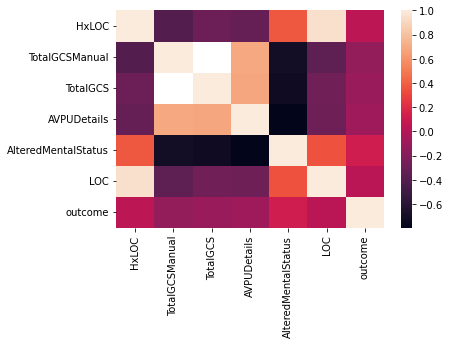

In [11]:
feat_conscious = ['HxLOC', 'TotalGCSManual', 'TotalGCS', 'AVPUDetails','AlteredMentalStatus', 'LOC','ControlType_x']
dfs_conscious=dfs[0].merge(dfs[3],how='left', on=['SITE', 'CaseID', 'StudySubjectID'])
dfs_conscious=dfs_conscious[feat_conscious]
# dfs_conscious.loc[:, 'ControlType_x'] = (dfs_conscious['ControlType_x'] == 'case').astype(int)

dfs_conscious = dfs_conscious.replace(['Y', 'YES', 'A'], 1)       
dfs_conscious = dfs_conscious.replace(['N', 'NO'], 0)
dfs_conscious = dfs_conscious.replace(['15'], 15)
dfs_conscious = dfs_conscious.replace(['10'], 10)
dfs_conscious = dfs_conscious.replace(['14'], 14)
dfs_conscious = dfs_conscious.replace(['6'], 6)
dfs_conscious = dfs_conscious.replace(['8'], 8)
dfs_conscious = dfs_conscious.replace(['12'], 12)
dfs_conscious = dfs_conscious.replace(['5'], 5)
dfs_conscious = dfs_conscious.replace(['13'], 13)
dfs_conscious = dfs_conscious.replace(['11'],11)
dfs_conscious = dfs_conscious.replace(['9'], 9)
dfs_conscious = dfs_conscious.replace(['7','7T'], 7)
dfs_conscious = dfs_conscious.replace(['4'], 4)
dfs_conscious = dfs_conscious.replace(['ND', 'NA', '3'], float("NaN"))
dfs_conscious = dfs_conscious.replace(['U','V','N', 'P'], 0)
# dfs_conscious=dfs_conscious.fillna(dfs_conscious.median()) 
# print(dfs_conscious['TotalGCS'])
# print(pd.unique(dfs_conscious['TotalGCS']))
dfs_conscious = dfs_conscious.rename(columns={'ControlType_x': 'outcome'})
dfs_conscious_corr=dfs_conscious.corr(method='pearson')
# .style.background_gradient(cmap="Blues")

sns.heatmap(dfs_conscious_corr)

## Group2: Complaint of pain in neck and age


<AxesSubplot:>

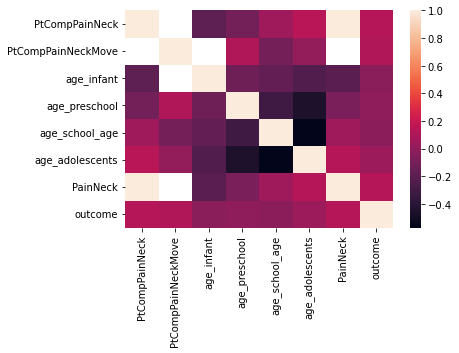

In [12]:
# feat_pain = ['PtCompPainHead', 'PtCompPainFace', 'PtCompPainNeck', 'PtCompPainNeckMove', 'PtCompPainChest', 'PtCompPainBack', 'PtCompPainFlank', 'PtCompPainAbd', 'PtCompPainPelvis', 'PtCompPainExt']
# demog_df = dfs[4]
clean_key_col_names = lambda df: df.rename(columns={'site': 'SITE',
                                                            'caseid': 'CaseID',
                                                            'studysubjectid': 'StudySubjectID'})
demog_df = clean_key_col_names(dfs[4])

agegroup_df = pd.get_dummies(pd.cut(demog_df['AgeInYears'], bins=[0, 2, 6, 12, 16],
                                            labels=['infant', 'preschool', 'school_age', 'adolescents'],
                                            include_lowest=True), prefix='age')
agegroup_df=pd.concat([demog_df[['SITE', 'CaseID', 'StudySubjectID']], agegroup_df], axis=1)

feat_pain = ['PtCompPainNeck', 'PtCompPainNeckMove', 'age_infant', 'age_preschool',  'age_school_age',  'age_adolescents','PainNeck','ControlType_x']
dfs_pain=dfs[0].merge(dfs[3],how='left', on=['SITE', 'CaseID', 'StudySubjectID'])
dfs_pain=dfs_pain.merge(agegroup_df,how='left', on=['SITE', 'CaseID', 'StudySubjectID'])
dfs_pain=dfs_pain[feat_pain]
dfs_pain = dfs_pain.replace(['Y', 'YES', 'A'], 1)       
dfs_pain = dfs_pain.replace(['N', 'NO'], 0)
dfs_pain = dfs_pain.replace(['ND', 'NA'], float("NaN"))
dfs_pain = dfs_pain.rename(columns={'ControlType_x': 'outcome'})
# dfs_pain=dfs_pain.fillna(dfs_pain.median()) 
# print(pd.unique(dfs_pain['PtCompPainNeckMove']))
dfs_pain_corr=dfs_pain.corr(method='pearson')
# .style.background_gradient(cmap="Blues")
sns.heatmap(dfs_pain_corr)

## Group3: Tenderness in neck


In [26]:
# feat_tender = ['PtTenderHead', 'PtTenderFace', 'PtTenderNeck', 'PtTenderNeckLevel', 'PtTenderNeckLevelC1', 'PtTenderNeckLevelC2', 'PtTenderNeckLevelC3', 'PtTenderNeckLevelC4', 'PtTenderNeckLevelC5', 'PtTenderNeckLevelC6', 'PtTenderNeckLevelC7', 'PtTenderNeckAnt', 'PtTenderNeckPos', 'PtTenderNeckLat', 'PtTenderNeckMid', 'PtTenderNeckOther', 'PtTenderChest', 'PtTenderBack', 'PtTenderFlank', 'PtTenderAbd', 'PtTenderPelvis', 'PtTenderExt']
feat_tender =['PtTenderNeck', 'PtTenderNeckLevel', 'PtTenderNeckLevelC1', 'PtTenderNeckLevelC2', 'PtTenderNeckLevelC3', 'PtTenderNeckLevelC4', 'PtTenderNeckLevelC5', 'PtTenderNeckLevelC6', 'PtTenderNeckLevelC7', 'PtTenderNeckAnt', 'PtTenderNeckPos', 'PtTenderNeckLat', 'PtTenderNeckMid', 'PtTenderNeckOther','PosMidNeckTenderness', 'TenderNeck','ControlType_x'] 

dfs_tender=dfs[0].merge(dfs[3],how='left', on=['SITE', 'CaseID', 'StudySubjectID'])
dfs_tender=dfs_tender[feat_tender]
dfs_tender = dfs_tender.replace(['Y', 'YES', 'A'], 1)       
dfs_tender = dfs_tender.replace(['N', 'NO'], 0)
dfs_tender = dfs_tender.replace(['ND', 'NA'], float("NaN"))
# dfs_tender=dfs_tender.fillna(dfs_tender.median()) 
# print(dfs_tender)
dfs_tender = dfs_tender.rename(columns={'ControlType_x': 'outcome'})
hide_column_neck=["PtTenderNeck", "PtTenderNeckLevel","PtTenderNeckLevelC1","PtTenderNeckLevelC2", "PtTenderNeckLevelC3","PtTenderNeckLevelC4","PtTenderNeckLevelC5","PtTenderNeckLevelC6","PtTenderNeckLevelC7","PtTenderNeckAnt","PtTenderNeckPos","PtTenderNeckLat","PtTenderNeckMid","PtTenderNeckOther","PosMidNeckTenderness","TenderNeck"]
dfs_tender_corr=dfs_tender.corr(method='pearson')
# .style.background_gradient(cmap="Blues").hide_columns(hide_column_neck)
dfs_tender_corr['outcome']

PtTenderNeck            0.040167
PtTenderNeckLevel       0.029306
PtTenderNeckLevelC1     0.030859
PtTenderNeckLevelC2     0.030202
PtTenderNeckLevelC3     0.008022
PtTenderNeckLevelC4     0.013563
PtTenderNeckLevelC5     0.022655
PtTenderNeckLevelC6     0.045919
PtTenderNeckLevelC7     0.065611
PtTenderNeckAnt        -0.018944
PtTenderNeckPos         0.048284
PtTenderNeckLat        -0.017775
PtTenderNeckMid         0.033987
PtTenderNeckOther       0.005980
PosMidNeckTenderness    0.052407
TenderNeck              0.047975
outcome                 1.000000
Name: outcome, dtype: float64

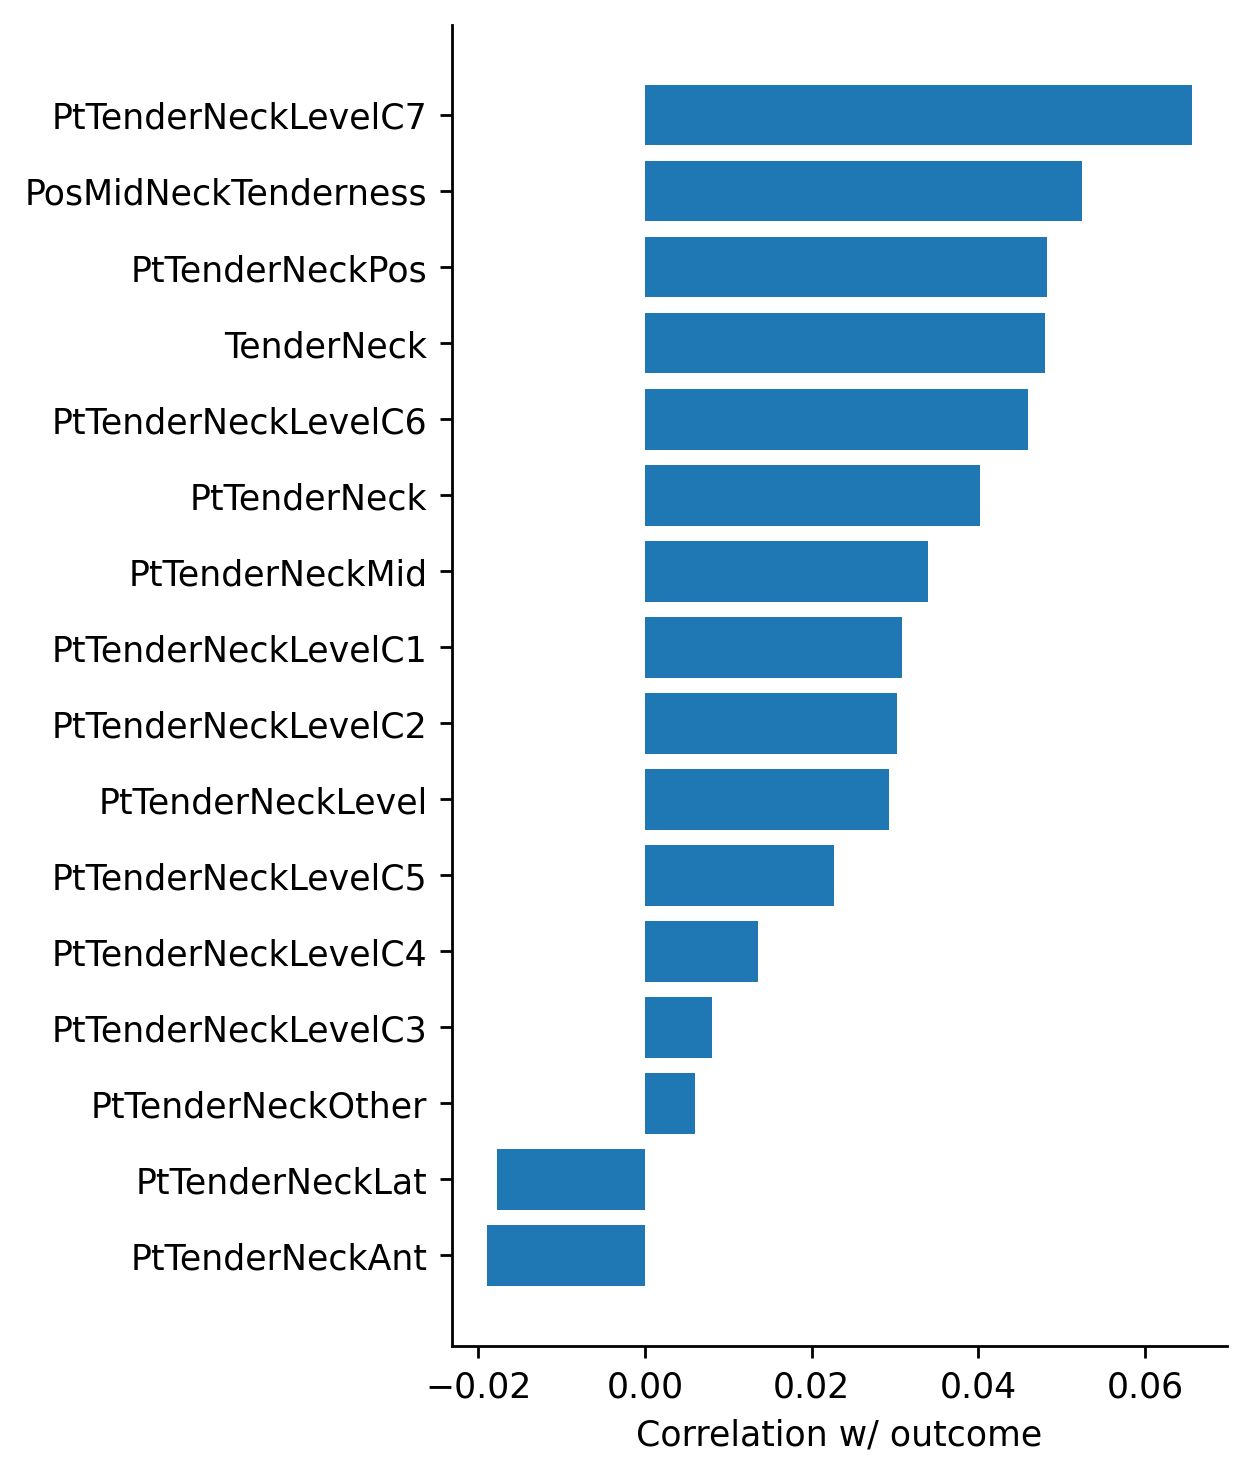

In [27]:
plt.figure(dpi=250, figsize=(4, 7))
vals = dfs_tender_corr['outcome']
args = np.argsort(vals)
labs = vals.index.values[args]
ax = plt.subplot(111)
plt.barh(labs[:-1], vals[args][:-1])
plt.xlabel('Correlation w/ outcome')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

## Group4: Focal neurological deficits

<AxesSubplot:>

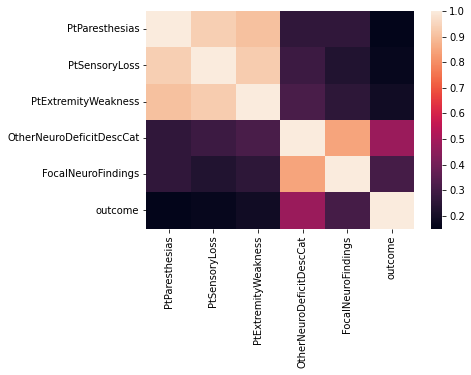

In [13]:
feat_focal= ['PtParesthesias', 'PtSensoryLoss', 'PtExtremityWeakness', 'OtherNeuroDeficitDescCat','FocalNeuroFindings','ControlType_x']
dfs_focal=dfs[0].merge(dfs[3],how='left', on=['SITE', 'CaseID', 'StudySubjectID'])
dfs_focal=dfs_focal[feat_focal]
dfs_focal = dfs_focal.replace(['Y', 'YES', 'A'], 1)       
dfs_focal = dfs_focal.replace(['N', 'NO'], 0)
dfs_focal = dfs_focal.replace(['3'], 3)
dfs_focal = dfs_focal.replace(['ND', 'NA'], float("NaN"))
dfs_focal = dfs_focal.rename(columns={'ControlType_x': 'outcome'})
# dfs_focal=dfs_focal.fillna(dfs_focal.median()) 
# print(pd.unique(dfs_focal['PtExtremityWeakness']))
dfs_focal_corr=dfs_focal.corr(method='pearson')
# .style.background_gradient(cmap="Blues")
sns.heatmap(dfs_focal_corr)

## Group 5: Other parts of the body

<AxesSubplot:>

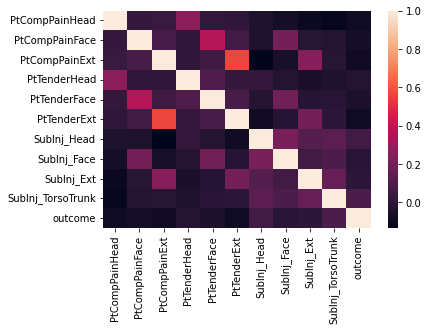

In [14]:
feat_otherpain = ['PtCompPainHead', 'PtCompPainFace', 'PtCompPainExt', 'PtTenderHead', 'PtTenderFace', 'PtTenderExt','SubInj_Head', 'SubInj_Face', 'SubInj_Ext', 'SubInj_TorsoTrunk','ControlType_x']
dfs_otherpain=dfs[0].merge(dfs[3],how='left', on=['SITE', 'CaseID', 'StudySubjectID'])
dfs_otherpain=dfs_otherpain[feat_otherpain]
dfs_otherpain = dfs_otherpain.replace(['Y', 'YES', 'A'], 1)       
dfs_otherpain = dfs_otherpain.replace(['N', 'NO'], 0)
dfs_otherpain = dfs_otherpain.replace(['ND', 'NA'], float("NaN"))
dfs_otherpain = dfs_otherpain.rename(columns={'ControlType_x': 'outcome'})
# dfs_focal=dfs_focal.fillna(dfs_focal.median()) 
# print(dfs_focal)
dfs_otherpain_corr=dfs_otherpain.corr(method='pearson')
# .style.background_gradient(cmap="Blues")
sns.heatmap(dfs_otherpain_corr)

## Group6: Injury mechanism


In [34]:
# feat_injury= ['InjuryPrimaryMechanism', 'HeadFirst', 'HeadFirstRegion','HighriskDiving', 'HighriskFall', 'HighriskHanging', 'HighriskHitByCar', 'HighriskMVC', 'HighriskOtherMV', 'AxialLoadAnyDoc', 'axialloadtop', 'Clotheslining','ControlType_x']
feat_injury= ['InjuryPrimaryMechanism', 'HeadFirst', 'HeadFirstRegion', 'ControlType_x']
dfs_injury=dfs[0].merge(dfs[6],how='left', on=['SITE', 'CaseID', 'StudySubjectID'])
dfs_injury=dfs_injury[feat_injury]
dfs_injury = dfs_injury.replace(['Y', 'YES', 'A'], 1)       
dfs_injury = dfs_injury.replace(['N', 'NO'], 0)
dfs_injury = dfs_injury.replace(['ND', 'NA'], float("NaN"))
dfs_injury=dfs_injury.rename(columns={'ControlType_x': 'outcome'})
# dfs_focal=dfs_focal.fillna(dfs_focal.median()) 
print(pd.unique(dfs_injury['HeadFirst']))
# hide_column_injury=["HeadFirst","HighriskDiving","HighriskFall","HighriskHanging","HighriskHitByCar","HighriskMVC","HighriskOtherMV","AxialLoadAnyDoc","axialloadtop","Clotheslining"]
dfs_injury_corr=dfs_injury.corr(method='pearson')
dfs_injury_corr['outcome']

HeadFirst    0.101228
outcome      1.000000
Name: outcome, dtype: float64